In [1]:
import copy
import pickle
import numpy as np
import glob
import os 
import sys

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord
from astropy import wcs
import astropy.units as u

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

from sn_cutout import ellipse

In [12]:
# we want the sn catalog
__current_dir__=os.path.abspath(os.getcwd())
__host_data_dir__=os.path.join(__current_dir__,"..","host_hists/host_data/")

candels_Ias = pickle.load(open(os.path.join(__host_data_dir__+'candels_Ias.pkl'),'rb'))
candels_CCs = pickle.load(open(os.path.join(__host_data_dir__+'candels_CCs.pkl'),'rb'))
candels_SNs = pickle.load(open(os.path.join(__host_data_dir__+'candels_SNs.pkl'),'rb'))

goods_Ias = pickle.load(open(os.path.join(__host_data_dir__+'goods_Ias.pkl'),'rb'))
goods_CCs = pickle.load(open(os.path.join(__host_data_dir__+'goods_CCs.pkl'),'rb'))

In [3]:
# the sn nicknames so we can name the file
nicks = [candels_Ias[i][0]['name'] for i in range(len(candels_Ias))]
# the sn coords so can mark the sn location at center of cutout
sn_coords = [SkyCoord(candels_Ias[i][0]['RA'],candels_Ias[i][0]['DEC'],unit = (u.hourangle,u.deg)) for i in range(len(candels_Ias))]

# the nearby survey
nearbys = [candels_Ias[i][1] for i in range(len(candels_Ias))]
# the host [survey,nearest ell rad,nearby ell rad]
hosts = [candels_Ias[i][2] for i in range(len(candels_Ias))]

# updating the surveys
updated_nearbys = []
for i in range(len(nearbys)):
    update = update_galaxy_survey.update_survey(nearbys[i])
    updated_nearbys.append(update)

updated_hosts = []
for i in range(len(hosts)):
    update = update_galaxy_survey.update_survey(hosts[i][0])
    updated_hosts.append([update,hosts[i][1],hosts[i][2]])

# renaming for clarity
nearbys = updated_nearbys
hosts = updated_hosts

ellipse(file, possible_hosts, sn_position, title, save=False, show=False)
requires 4 arguments; 2 optional

1. file is the cutout fits file for the sn we are going to put the ellipses on. it requires the sn id/nickname.
2. possible_hosts should be a list of the nearby hosts, each element in list another 4 element list with the given candidates [skycoord, a, b, theta]. 
The ellipse function isn't smart enough to get this from a given nearby survey which is why this needs to be put together in the nb.
3. skycoord of sn loc
4. title is for the figure, maybe just a string with sn id

optionally save the output figure with ellipses on cutout to a folder nearby_host_ellipses and/or show in nb

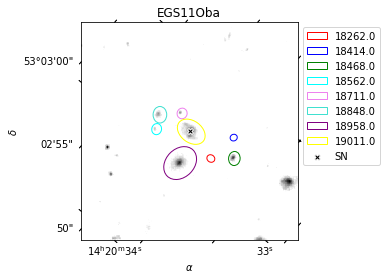

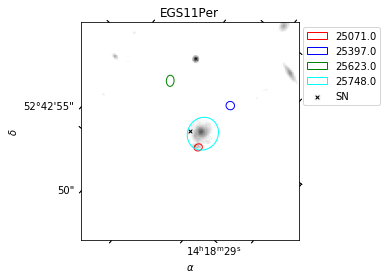

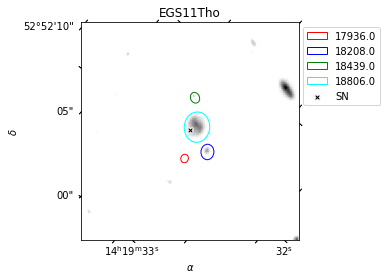

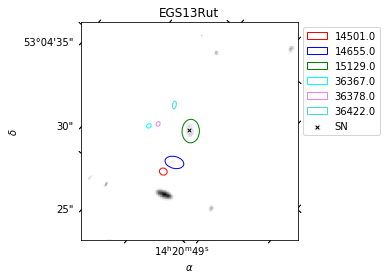

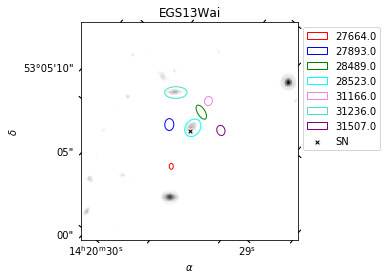

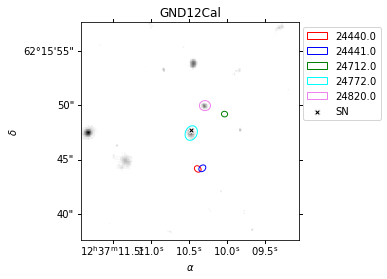

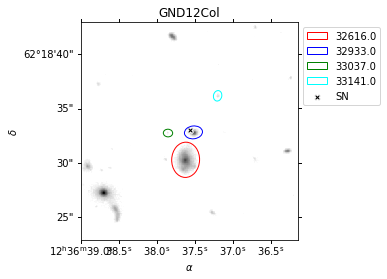

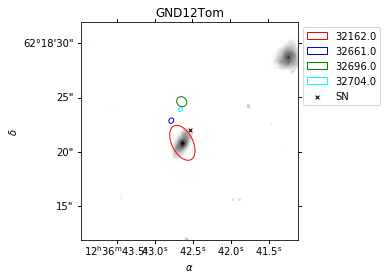

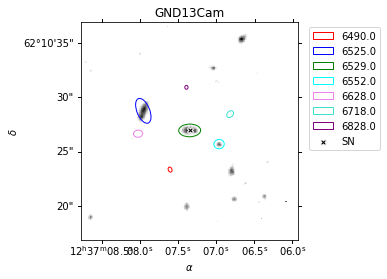

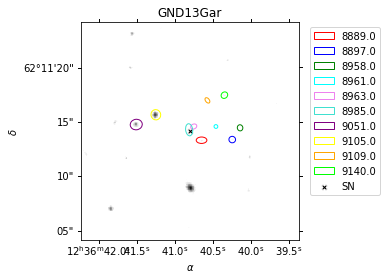

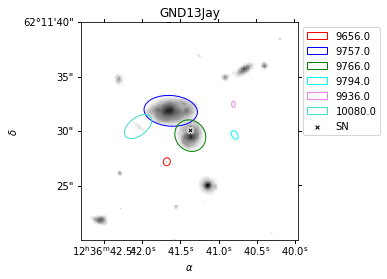

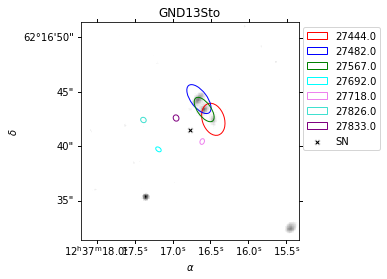

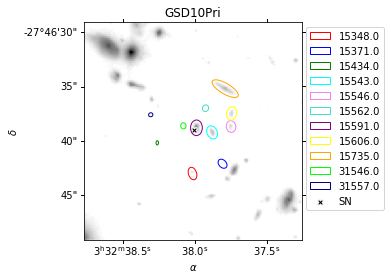

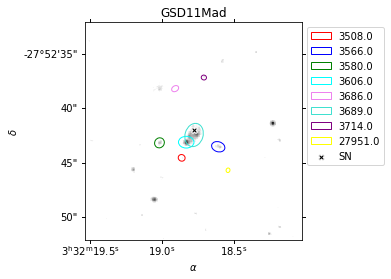

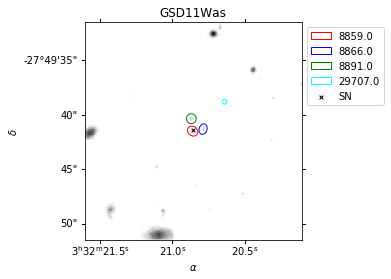

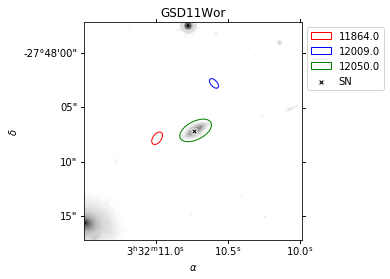

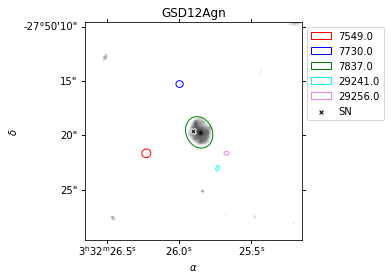

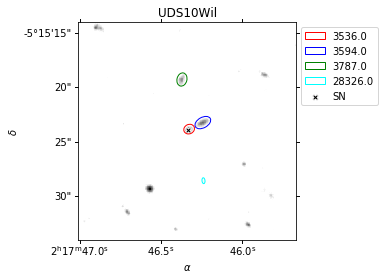

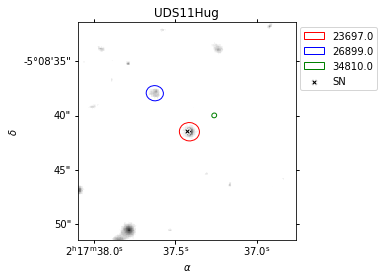

In [5]:
for i in range(len(candels_Ias)):
    # the SN nickname
    nick = nicks[i]
    # the SN skycoord location
    sn_loc = sn_coords[i]
    
    # the nearby to the SN
    nearby = nearbys[i]
    # getting list of the ids, elliptical parameters for each nearby for this SN
    ids = [i for i in nearby.mass[nearby.ids]]
    nearby_coords = [i for i in nearby.gal_skycoords()]
    a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
    b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
    theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
    
    
    # 5 element list, each element another x element list for a given SN with the x candidate parameters.
    possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids]
    
    # the ellipse 2nd argument wants a list with the x candidate parameters all together 
    # ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
    possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4]))
    
    #print(possible_hosts)
    ellipse(nick.lower()+'.fits',possible_hosts,sn_loc,title=nick,save=False,show=True)

In [7]:
# same thing now for the CC rather than Ia

# the sn nicknames so we can name the file
nicks = [candels_CCs[i][0]['name'] for i in range(len(candels_CCs))]
# the sn coords so can mark the sn location at center of cutout
sn_coords = [SkyCoord(candels_CCs[i][0]['RA'],candels_CCs[i][0]['DEC'],unit = (u.hourangle,u.deg)) for i in range(len(candels_CCs))]

# the nearby survey
nearbys = [candels_CCs[i][1] for i in range(len(candels_CCs))]
# the host [survey,nearest ell rad,nearby ell rad]
hosts = [candels_CCs[i][2] for i in range(len(candels_CCs))]

# updating the surveys
updated_nearbys = []
for i in range(len(nearbys)):
    update = update_galaxy_survey.update_survey(nearbys[i])
    updated_nearbys.append(update)

updated_hosts = []
for i in range(len(hosts)):
    update = update_galaxy_survey.update_survey(hosts[i][0])
    updated_hosts.append([update,hosts[i][1],hosts[i][2]])

# renaming for clarity
nearbys = updated_nearbys
hosts = updated_hosts

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


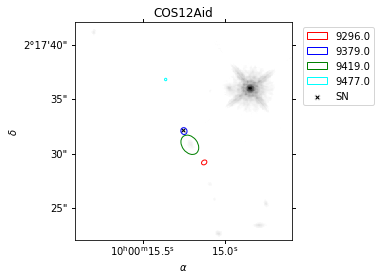

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


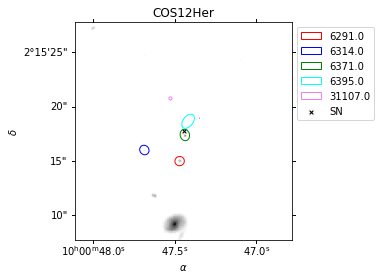

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


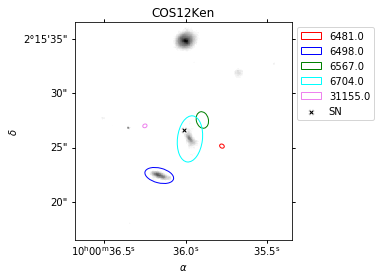

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


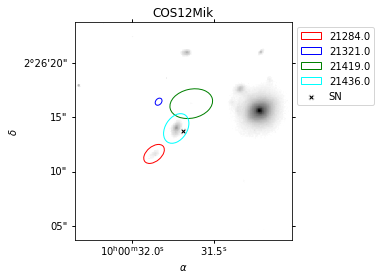

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


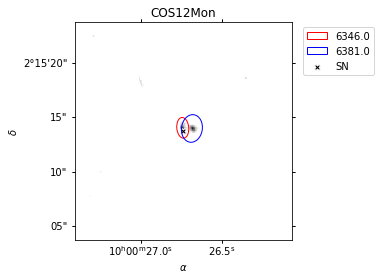

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


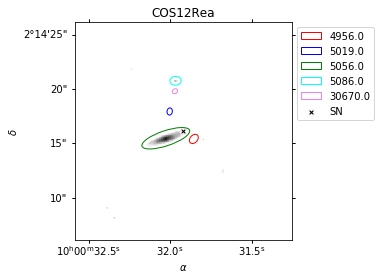

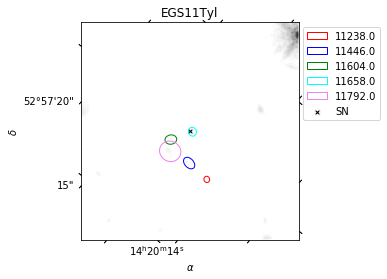

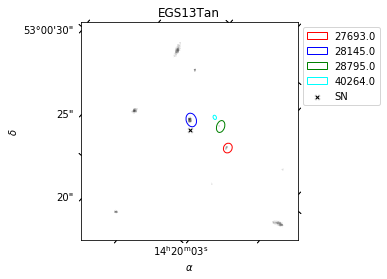

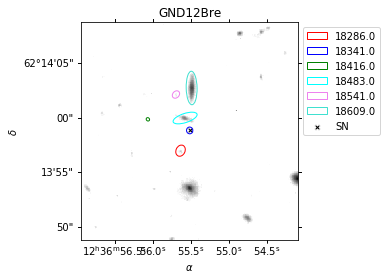

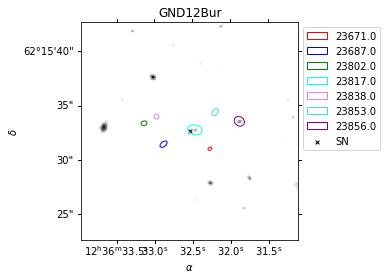

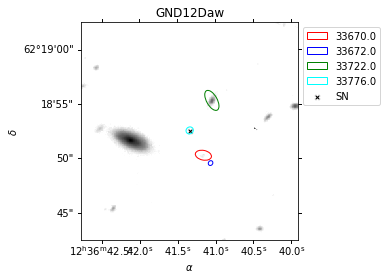

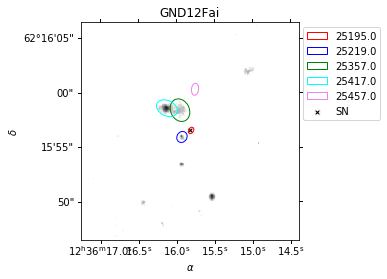

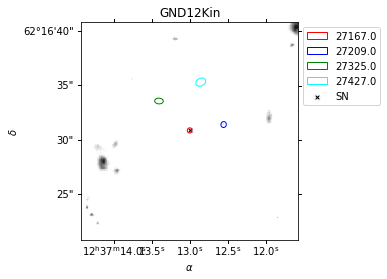

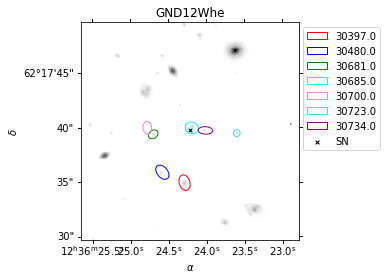

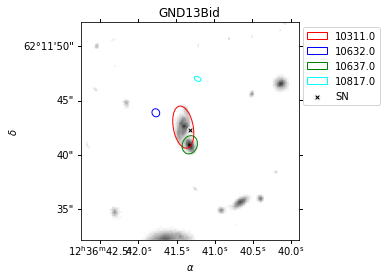

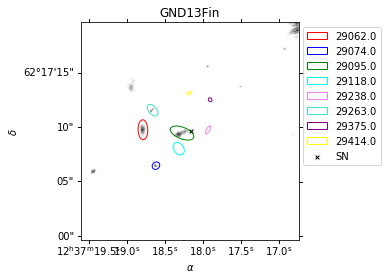

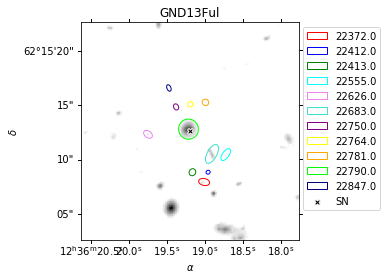

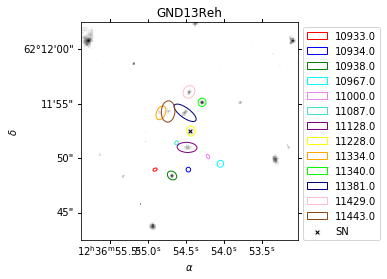

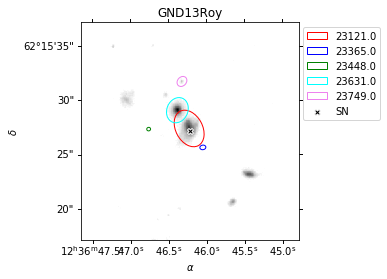

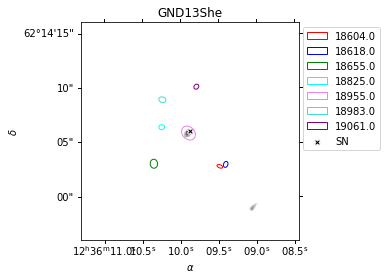

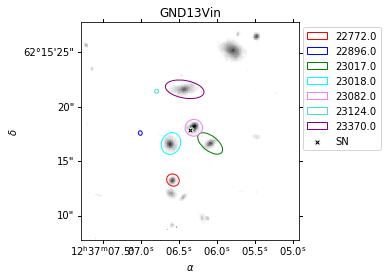

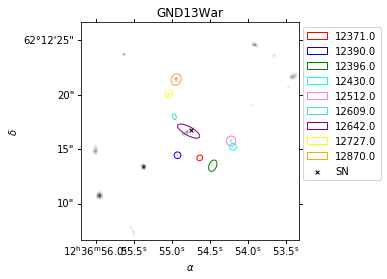

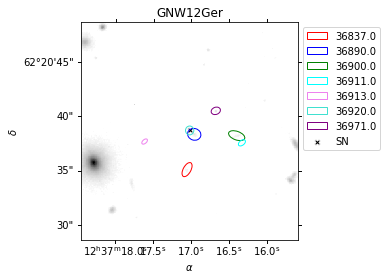

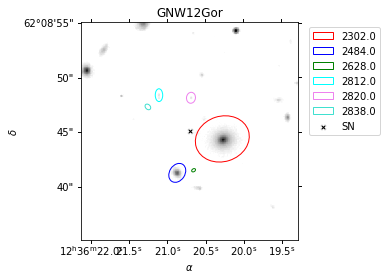

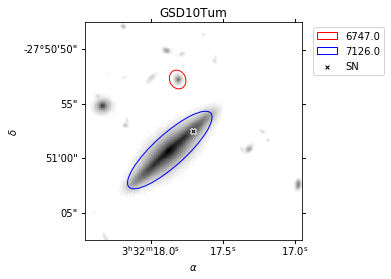

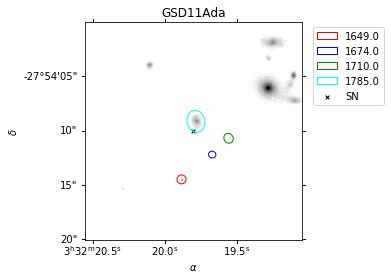

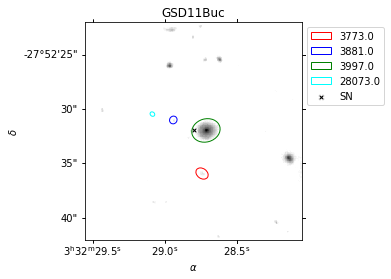

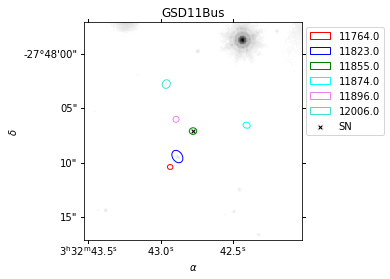

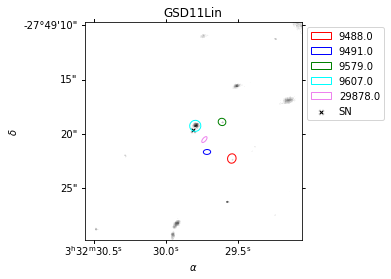

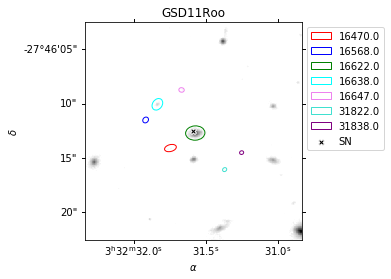

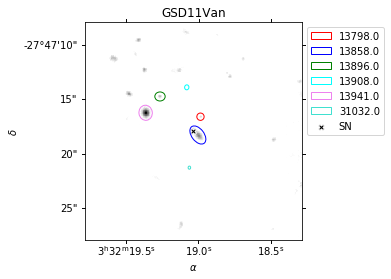

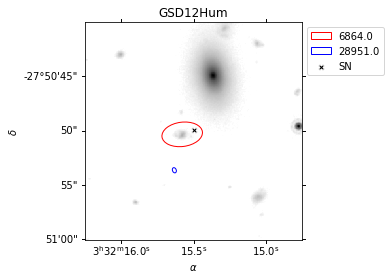

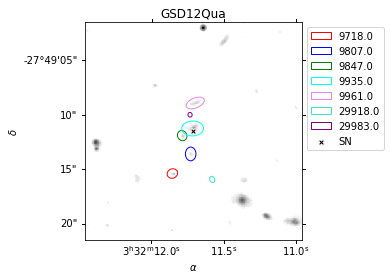

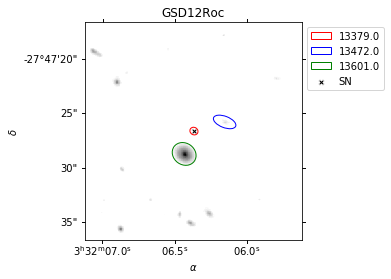

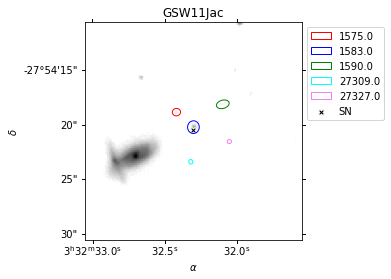

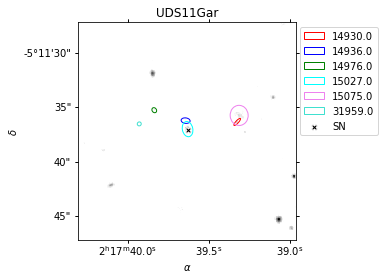

In [8]:
for i in range(len(candels_CCs)):
    # the SN nickname
    nick = nicks[i]
    # the SN skycoord location
    sn_loc = sn_coords[i]
    
    # the nearby to the SN
    nearby = nearbys[i]
    # getting list of the ids, elliptical parameters for each nearby for this SN
    ids = [i for i in nearby.mass[nearby.ids]]
    nearby_coords = [i for i in nearby.gal_skycoords()]
    a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
    b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
    theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
    
    
    # 5 element list, each element another x element list for a given SN with the x candidate parameters.
    possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids]
    
    # the ellipse 2nd argument wants a list with the x candidate parameters all together 
    # ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
    possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4]))
    
    #print(possible_hosts)
    ellipse(nick.lower()+'.fits',possible_hosts,sn_loc,title=nick,save=False,show=True)

In [10]:
# now for the unknown type 

# the sn nicknames so we can name the file
nicks = [candels_SNs[i][0]['name'] for i in range(len(candels_SNs))]
# the sn coords so can mark the sn location at center of cutout
sn_coords = [SkyCoord(candels_SNs[i][0]['RA'],candels_SNs[i][0]['DEC'],unit = (u.hourangle,u.deg)) for i in range(len(candels_SNs))]

# the nearby survey
nearbys = [candels_SNs[i][1] for i in range(len(candels_SNs))]
# the host [survey,nearest ell rad,nearby ell rad]
hosts = [candels_SNs[i][2] for i in range(len(candels_SNs))]

# updating the surveys
updated_nearbys = []
for i in range(len(nearbys)):
    update = update_galaxy_survey.update_survey(nearbys[i])
    updated_nearbys.append(update)

updated_hosts = []
for i in range(len(hosts)):
    update = update_galaxy_survey.update_survey(hosts[i][0])
    updated_hosts.append([update,hosts[i][1],hosts[i][2]])

# renaming for clarity
nearbys = updated_nearbys
hosts = updated_hosts

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


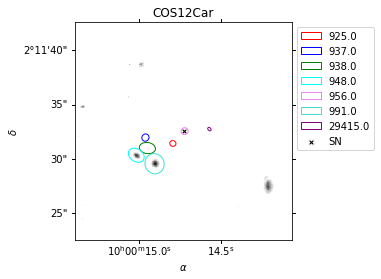

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


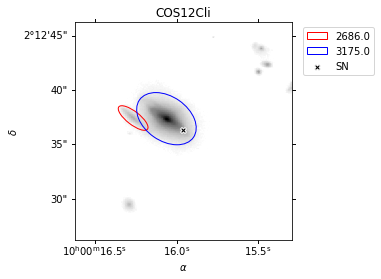

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


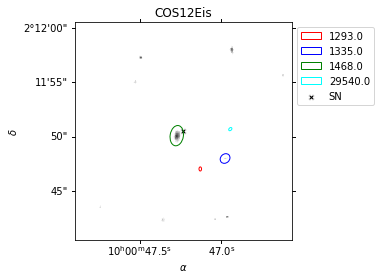

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


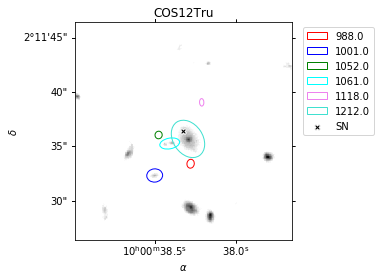

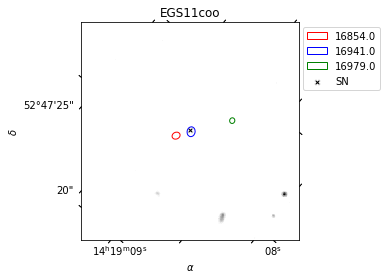

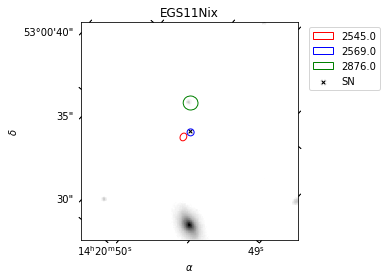

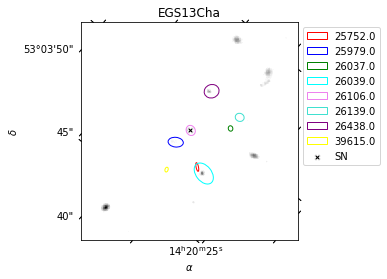

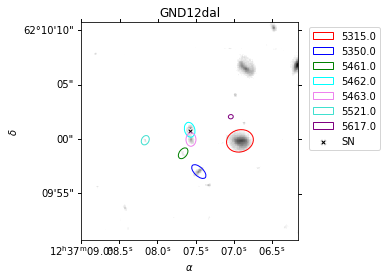

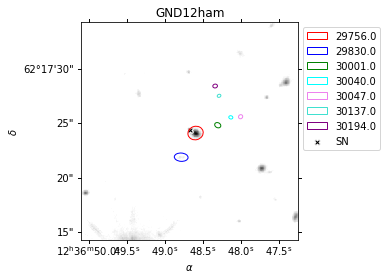

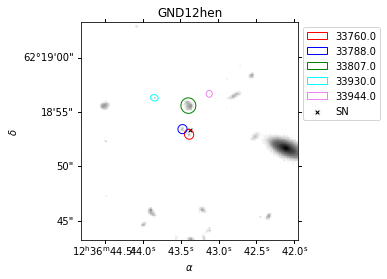

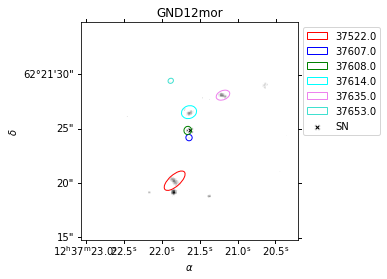

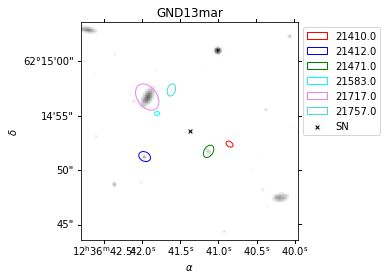

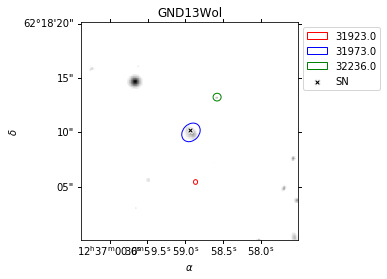

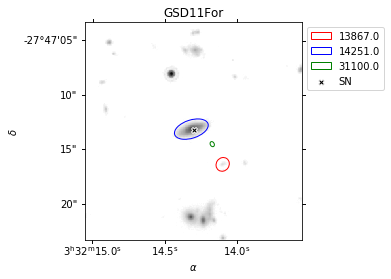

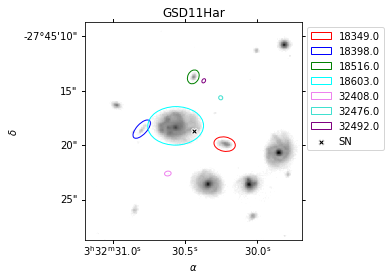

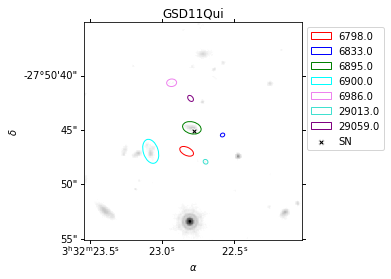

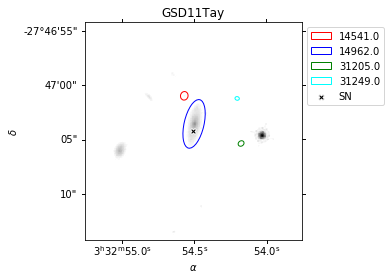

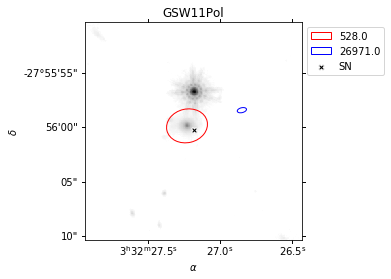

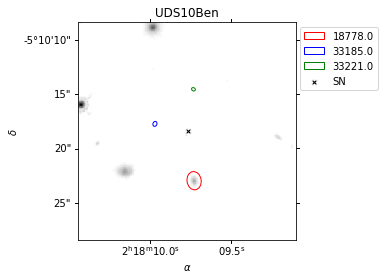

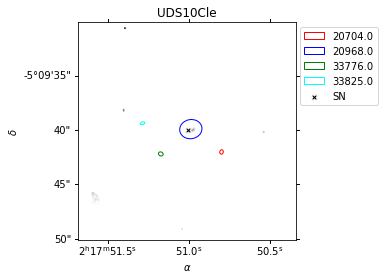

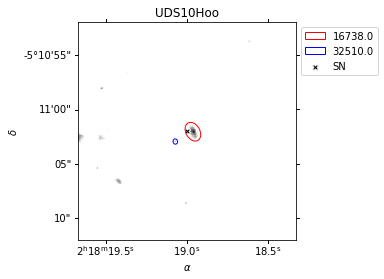

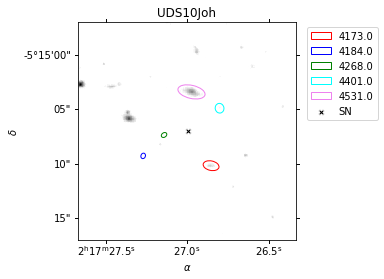

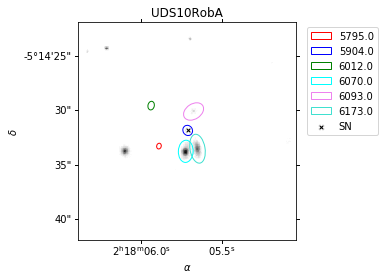

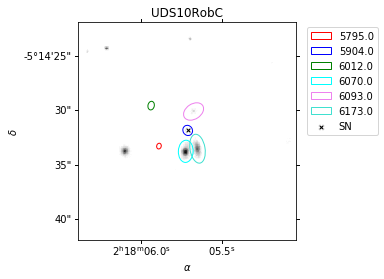

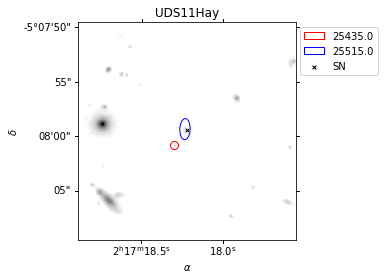

In [11]:
for i in range(len(candels_SNs)):
    # the SN nickname
    nick = nicks[i]
    # the SN skycoord location
    sn_loc = sn_coords[i]
    
    # the nearby to the SN
    nearby = nearbys[i]
    # getting list of the ids, elliptical parameters for each nearby for this SN
    ids = [i for i in nearby.mass[nearby.ids]]
    nearby_coords = [i for i in nearby.gal_skycoords()]
    a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
    b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
    theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
    
    
    # 5 element list, each element another x element list for a given SN with the x candidate parameters.
    possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids]
    
    # the ellipse 2nd argument wants a list with the x candidate parameters all together 
    # ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
    possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4]))
    
    #print(possible_hosts)
    ellipse(nick.lower()+'.fits',possible_hosts,sn_loc,title=nick,save=False,show=True)

For goods the SN table has different headers, need to adjust this accordingly for naming nicks and sn_coords...
otherwise exactly the same

On second thought these goods Ias and CCs SN actually didn't have any matches; they must not be in any of the fields which I should double check the coords of these supernova to make sure that is the case but they are older. 

They can't be visualized with the fields I have.

In [15]:
# the sn nicknames so we can name the file
nicks = [goods_Ias[i][0]['name'] for i in range(len(goods_Ias))]
# the sn coords so can mark the sn location at center of cutout
sn_coords = [SkyCoord(goods_Ias[i][0]['ra'],goods_Ias[i][0]['dec'],unit = (u.hourangle,u.deg)) for i in range(len(goods_Ias))]

# the nearby survey
nearbys = [goods_Ias[i][1] for i in range(len(goods_Ias))]
# the host [survey,nearest ell rad,nearby ell rad]
hosts = [goods_Ias[i][2] for i in range(len(goods_Ias))]

# updating the surveys
updated_nearbys = []
for i in range(len(nearbys)):
    update = update_galaxy_survey.update_survey(nearbys[i])
    updated_nearbys.append(update)

updated_hosts = []
for i in range(len(hosts)):
    update = update_galaxy_survey.update_survey(hosts[i][0])
    updated_hosts.append([update,hosts[i][1],hosts[i][2]])

# renaming for clarity
nearbys = updated_nearbys
hosts = updated_hosts

In [16]:
for i in range(len(goods_Ias)):
    # the SN nickname
    nick = nicks[i]
    # the SN skycoord location
    sn_loc = sn_coords[i]
    
    # the nearby to the SN
    nearby = nearbys[i]
    # getting list of the ids, elliptical parameters for each nearby for this SN
    ids = [i for i in nearby.mass[nearby.ids]]
    nearby_coords = [i for i in nearby.gal_skycoords()]
    a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
    b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
    theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
    
    
    # 5 element list, each element another x element list for a given SN with the x candidate parameters.
    possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids]
    
    # the ellipse 2nd argument wants a list with the x candidate parameters all together 
    # ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
    possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4]))
    
    #print(possible_hosts)
    ellipse(nick.lower()+'.fits',possible_hosts,sn_loc,title=nick,save=False,show=True)

FileNotFoundError: [Errno 2] No such file or directory: 'cutouts/sn2002kc.fits'

In [17]:
nicks

['SN2002kc',
 'HST04Kur',
 'HST04Yow',
 'SN2002dc',
 'HST04Haw',
 'HST05Zwi',
 'SN2002hr',
 'HST05Dic',
 'SN2003be',
 'SN2002lg',
 'SN2003bd',
 'SN2002kd',
 'HST04Rak',
 'SN2003eu',
 'HST05Spo',
 'HST04Man',
 'SN2003eb',
 'SN2003lv',
 'SN2002dd',
 'SN2003es',
 'HST05Tha',
 'HST04Omb',
 'HST05Str',
 'HST04Eag',
 'HST05Fer',
 'HST05Gab',
 'HST04Gre',
 'SN2002ki',
 'HST05Koe',
 'SN2003az',
 'SN2002fw',
 'SN2002hp',
 'SN2003aj',
 'SN2003dy',
 'HST04Mcg',
 'HST04Sas',
 'SN2002fx',
 'SN2003ak',
 'SN1997ff']